# Analyzing Amazon Reviews using FireDucks at lightning speed just like their delivery 😃

## Introduction

Data is the new oil and this oil is needed to fuel a company's growth. In today's world, that is made possible by deriving insights from the data a company collects about their users and products. By cleaning and analyzing such data, one can make intelligent decisions about which products to continue (or discontinue) in the market.

Moreover, gaining information about the user can help the company offer personalized recommendations. For today's tutorial, we will be covering the product review dataset of Amazon, one of the largest e-commerce website in the world.

Analyzing large datasets such as Amazon Review Dataset is made possible by Pandas - a python library used for CSV and JSON data preprocessing and analysis. While Pandas is quite powerful and widely known among the Python and Data Science community, NEC has recently developed FireDucks which could serve as a faster substitute.

But first, what is FireDucks and why do we need it?

### What is FireDucks?

[FireDucks](https://fireducks-dev.github.io/) is a high-performance DataFrame library designed to enhance data analysis tasks which are traditionally performed with pandas. <b>But why should we use FireDucks when we have Pandas already in place?</b>

One of the main advantages of FireDucks is that it aims to provide <b>significant speed improvements</b> (sometimes over 100x) on CPU-only systems without requiring users to learn new APIs or migrate their existing pandas code. This means that as an end-user, I do not have to learn any new sytax or functions to get started with FireDucks. You can easily compile your exisiting code just by using the Fireducks plugin.

FireDucks's <b>speed</b> along with its <b>ease of use</b> makes it a better choice among other data analysis libraries.

Great! So now we know why FireDucks is a better alternative, let's see how to install it in our Python environment. 

## Installing FireDucks

Currently, FireDucks is available for Linux Systems only. If you have a Windows or a Mac Operating System, the FireDucks can be installed via WSL (Windows Subsystem for Linux) or via Virtual Machines. Alternatively, you can also use Google Colab. 

Installing FireDucks is straightfoward via <code>pip</code>. Head to your terminal and type <code>pip install fireducks</code>. More information is provided on FireDuck's Official Website.

Once the installation is complete, we can run our existing python file in FireDucks  by using the extension <code>python3 -mfireducks.pandas filename.py</code>. This implies that no further changes to the current code are required for FireDucks which makes it easy to get started!

## Environment Setup

The following experiment has been carried out with the following environment setup

#### Hardware
1. Memory: 16 GB 
2. Logical Cores: 12
3. Operating System: WSL on Windows 11

In [1]:
import platform, psutil
print("="*30, "Evaluation Environment Information", "="*30)
print(f'platform: {platform.system()}')
print(f'architecture: {platform.machine()}')
print(f'processor: {platform.processor()}')
print(f'cpu: {psutil.cpu_count()}')
print(f'ram: {str(round(psutil.virtual_memory().total / (1024 ** 3)))} GB')

============================== Evaluation Environment Information ==============================
platform: Linux
architecture: x86_64
processor: x86_64
cpu: 12
ram: 8 GB


#### Packages to be installed
1. [Pandas](https://pandas.pydata.org/) (Version - 2.2.2)
2. [Matplotlib](https://matplotlib.org/stable/) (Version - 3.9.1)
3. [FireDucks](https://fireducks-dev.github.io/) (Version - 0.13.1)

If any of these libraries are not yet installed in your python environment, you can do so by `pip install <package-name>` or by heading to their official websites. 

Let us now move to importing these libraries.

## Importing Libraries

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt

The above code when successfully executed should result in no output. In case of import error, try to check if the libraries were correctly installed or if their versions are compatible with each other. 


The setup is now complete, let us move to our dataset.

## About the Dataset

The dataset used for this tutorial is the Amazon Review Dataset (All Beauty) which has been made open-source via Kaggle and can be downloaded from [here](https://www.kaggle.com/datasets/wajahat1064/amazon-reviews-data-2023). 

The review dataset has a total of 701,528 rows (or instances) and 10 columns (or attributes). The dataset is available in JSON format and contains information such as the product id, user rating, whether the vote was helpful, etc. 

By analyzing the review dataset, we aim to get some insights about the products and the users. 

## Loading our dataset

Let's first perform some analysis starting from data loading using native pandas

In [3]:
print(f"{pd.__name__} == {pd.__version__}")

pandas == 2.2.2


### Setting the Path

Make sure to provide the correct path to the dataset. Change the path below accordingly.

In [4]:
DATASET = "All_Beauty.jsonl"

In [5]:
pandas_exec_time_tracker = []

### Data Loading from JSONL file

In [6]:
start_time = time.time()
data = pd.read_json(DATASET, lines=True)
data_load_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for data loading: {data_load_t} seconds")
pandas_exec_time_tracker.append(data_load_t)
data.head()

[pandas] Time taken for data loading: 9.09580111503601 seconds


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


Let us also verify the datatype for our dataset.

In [7]:
type(data)

pandas.core.frame.DataFrame

Let us have a look at our dataset now.

In [8]:
data.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [9]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


The Amazon Beauty Dataset has many columns including the product id, user id, reviews, etc. The next step of data analysis is what questions do we need the answers to?

Data Analysis serves a purpose. Therefore, it is important to first define a problem statement and then move to data analysis which is only a  tool to get our answers. 

Today, we will consider 4 main questions. 

# Questions to consider: Defining the problem statement
1. What is the distribution of ratings? Are there any patterns in the frequency of each rating (e.g., more 5-star ratings than 1-star)?
2. Is there a correlation between the review length vs the rating left by the user?
3. What are the Top 10 reviewed products by Product ID (to see which products are doing well)?
4. Who are the most active users?

### Aggregate functions

To get the products with most number of reviews, we will first group our dataset by the product id (denoted by `asin`) and then count the size for each product id. This will give us the total number of reviews per product. 

### 1. Distribution of Ratings

In [10]:
start_time = time.time()
rating_distribution = data[['rating']].value_counts(sort=False)
q1_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for the calculation of rating distribution: {q1_t} seconds")
pandas_exec_time_tracker.append(q1_t)
rating_distribution

[pandas] Time taken for the calculation of rating distribution: 0.022946596145629883 seconds


rating
1         102080
2          43034
3          56307
4          79381
5         420726
Name: count, dtype: int64

Let us also plot the distribution

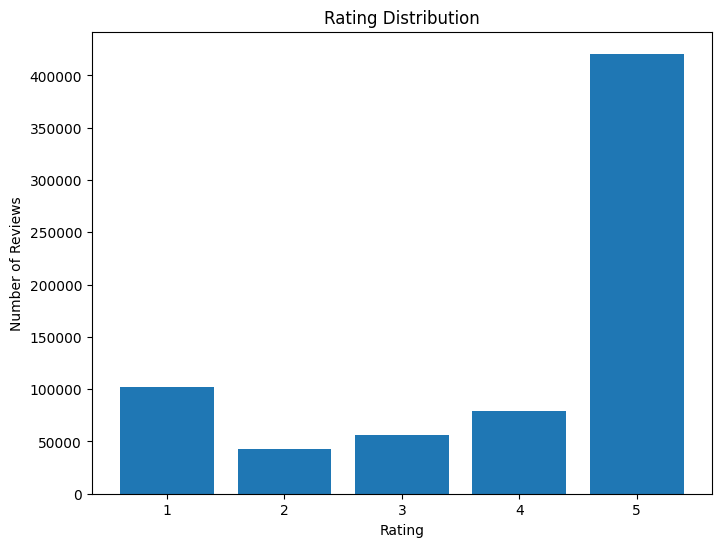

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(list(rating_distribution.index.get_level_values(0)), list(rating_distribution.values))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

<b>Inference</b>: The number of people who have given 5 star ratings is the highest and the difference is quite stark. It is followed by 1 star rating whereas 2, 3, and 4 stars' count stand in the middle. Hence, there is a pattern of more 5 star ratings than 1 star, as we hypothesized before.

Let us now move on to our second question, if there is a relationship between the length of review a user wrote vs. the rating they left.

### 2. Review Length vs Rating

In [12]:
start_time = time.time()
data['review_length'] = data['text'].str.len()
q2_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken to create a new column with length information: {q2_t} seconds")
pandas_exec_time_tracker.append(q2_t)

[pandas] Time taken to create a new column with length information: 0.2387981414794922 seconds


<Figure size 1000x600 with 0 Axes>

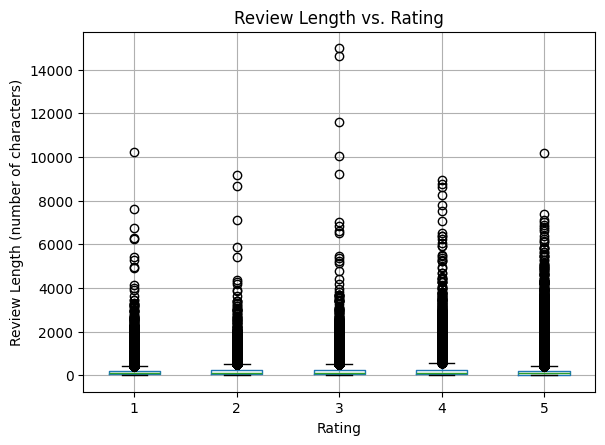

In [13]:
plt.figure(figsize=(10, 6))
data.boxplot(column='review_length', by='rating', grid=False)
plt.title('Review Length vs. Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Review Length (number of characters)')
plt.grid(True)
plt.show()

The distibution for `3 star` rating is more skewed than others. For `5 star` or `4 star` ratings, the review length is higher than others, such as `1 star` or `2 star` rating.

### 3. Top 10 reviewed products by Product ID

In [14]:
start_time = time.time()
count_by_id = data.groupby("asin").size().reset_index(name="review_count")
top_10 = count_by_id.sort_values(by="review_count", ascending=False).head(10)
q3_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 popular products: {q3_t} seconds")
pandas_exec_time_tracker.append(q3_t)
top_10

[pandas] Time taken for finding top-10 popular products: 0.4531538486480713 seconds


,asin,review_count
5476,B007IAE5WY,1962
8717,B00EEN2HCS,1750
49919,B07C533XCW,1513
15524,B00R1TAN7I,1372
93618,B08L5KN7X4,1343
23259,B019GBG0IE,1328
38782,B0719KWG8H,1168
6364,B0092MCQZ4,1128
19090,B0107QYW14,1112
5290,B0070Z7KME,934


Let us know the plot of the top 10 products having the most number of reviews.

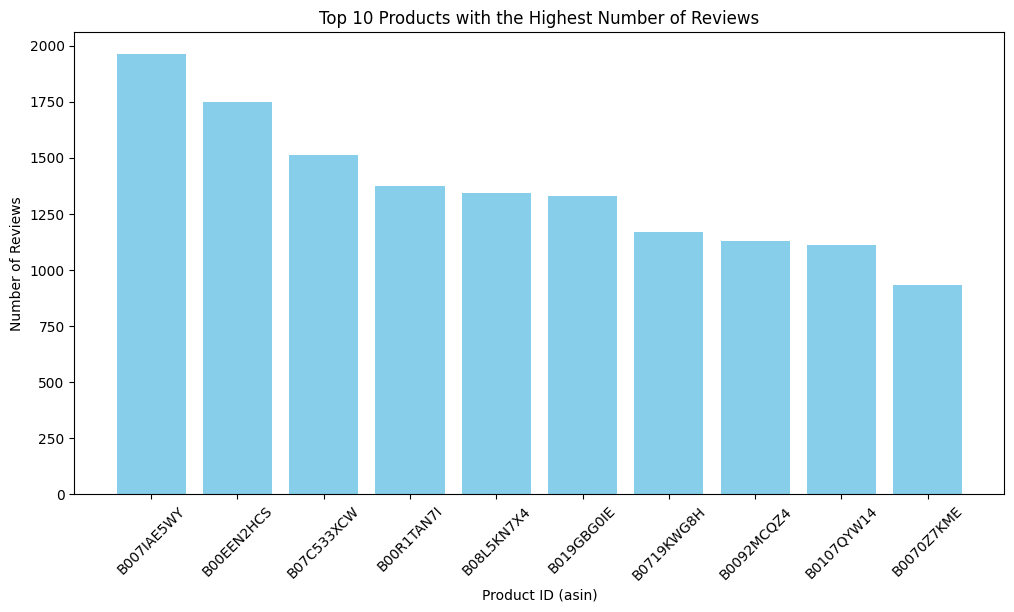

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(top_10['asin'], top_10["review_count"], color='skyblue')
plt.xlabel('Product ID (asin)')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Products with the Highest Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### 4. Most active users

Similarly, to find out which users left the most number of reviews, we will group our data by User ID(denoted by `user_id`) and then calculate the number of rows per User ID.

We will also plot our data in the form of a bar chart to help us visualize the most active users on Amazon's Website.

In [16]:
start_time = time.time()
count_by_userid = data.groupby("user_id").size().reset_index(name="review_count")
popular_user = count_by_userid.sort_values(by="review_count", ascending=False).head(10)
q4_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 popular users: {q4_t} seconds")
pandas_exec_time_tracker.append(q4_t)
popular_user

[pandas] Time taken for finding top-10 popular users: 1.638758897781372 seconds


,user_id,review_count
340457,AG73BVBKUOH22USSFJA5ZWL7AKXA,165
156408,AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,146
92332,AEMP3A7IKW37CMWFXNKXWW6HGJHA_1,115
522437,AHDVSLWHSORYGG3S5QZMVDFNOXUQ,108
472775,AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,87
206979,AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2,83
302694,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,81
78240,AEJU3Z6HDAERETMYI2CXBQVPPDFA,79
622381,AHY2TURQPNIDXZGH2CMQLZ343YMQ,69
101652,AEOK4TQIKGO23SJKZ6PW4FETNNDA_1,68


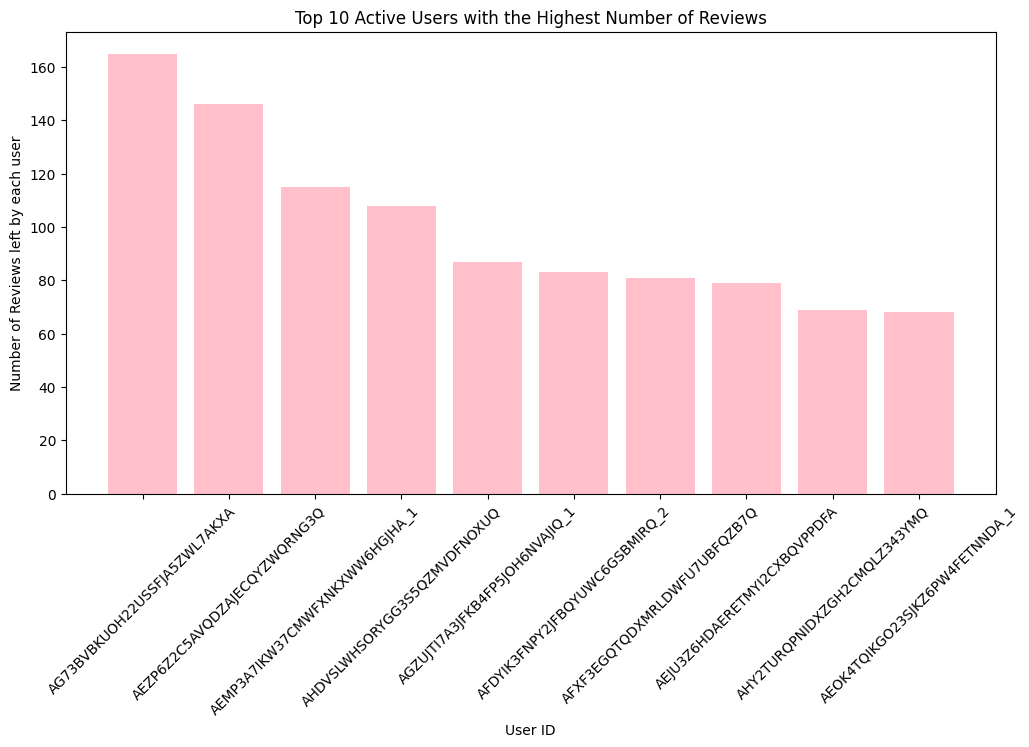

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(popular_user["user_id"], popular_user["review_count"], color='pink')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews left by each user')
plt.title('Top 10 Active Users with the Highest Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### Save pandas evaluation data

In [18]:
eval_df = pd.DataFrame()
eval_df["pandas_exec_time (s)"] = pandas_exec_time_tracker
eval_df.index = pd.Index(["data_loading", "query_1", "query_2", "query_3", "query_4"], name = "task")
eval_df.to_csv("eval.csv")

# Acceleration using `fireducks.pandas`

Now, let's re-run the Pandas code above with the fireducks.pandas extension loaded.

Typically, you should load the `fireducks.pandas` extension as the first step in your notebook, before importing any modules. 
Here, we explicitly reset the kernel variables to simulate that behavior.

In [19]:
%reset -f

In [20]:
%load_ext fireducks.pandas
import pandas as pd
import time
import matplotlib.pyplot as plt

### Checking the version of `fireducks`

In [21]:
import fireducks.core as fcore
import fireducks
fcore.set_fireducks_option("fireducks-version", True)
print(f"{fireducks.__name__} == {fireducks.__version__}")

fireducks.pandas == 1.0.0


In [22]:
DATASET = "All_Beauty.jsonl"

### Using `_evaluate()` method for evaluating the performance of `Fireducks`
As mentioned above, `Fireducks` optimizes speed by converting the `Python` code to an intermediate language, optimizing the order of execution, and then executing all the statements at once. When we time the execution by `Fireducks` using conventional methods, we might not get the most accurate results. To overcome this issue we can invoke a method `_evaluate()` to force the execution of all the instructions and give us the correct results. Please note that when using `Fireducks` for daily activities this is not needed. To see more information on the above, please follow the link: https://fireducks-dev.github.io/docs/user-guide/02-exec-model/#lazy-execution-model

In [23]:
def evaluate(df):
    if hasattr(df, "_evaluate"):
        # to enforce the instructions associated with "df" to be evaluated
        # for FireDucks case
        df._evaluate()

In [24]:
fireducks_exec_time_tracker = []

### Data Loading from `JSONL` file using FireDucks

In [25]:
start_time = time.time()
data = pd.read_json(DATASET, lines=True)
evaluate(data) # to enforce data-loading to take place at this very point
data_load_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for data loading: {data_load_t} seconds")
fireducks_exec_time_tracker.append(data_load_t)
data.head()

[fireducks.pandas] Time taken for data loading: 1.9617910385131836 seconds


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


As we can see, FireDucks is much faster than `Pandas`.

But why is this important?

In this case, our dataset has 700k instances, therefore a difference of a few seconds might not seem a lot. However, in the world of big data where the datasets have millions of rows, this time would have significant impact. Faster Computation is especially useful when dealing with real-time data or using up resources. 

In [26]:
type(data)

fireducks.pandas.frame.DataFrame

For pandas, the expected data type is `pandas.frame.DataFrame` whereas if executed using FireDucks, the datatype should be `fireducks.pandas.frame.DataFrame`.

Now re-execute the same queries on this `data` instance.

### 1. Distribution of Ratings

In [27]:
start_time = time.time()
rating_distribution = data[['rating']].value_counts(sort=False)
evaluate(rating_distribution) 
q1_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for the calculation of rating distribution: {q1_t} seconds")
fireducks_exec_time_tracker.append(q1_t)
rating_distribution

[fireducks.pandas] Time taken for the calculation of rating distribution: 0.023617029190063477 seconds


rating
1.0       102080
2.0        43034
3.0        56307
4.0        79381
5.0       420726
Name: count, dtype: int64

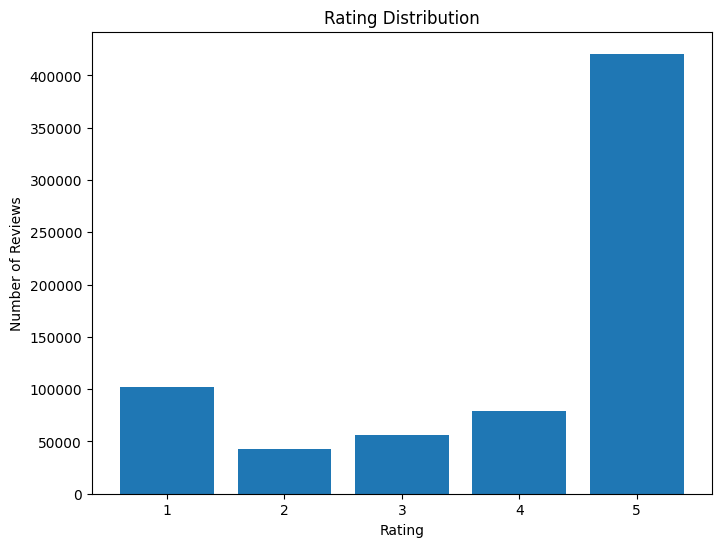

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(list(rating_distribution.index.get_level_values(0)), list(rating_distribution.values))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

### 2. Review Length vs Rating

In [29]:
start_time = time.time()
data['review_length'] = data['text'].str.len()
evaluate(data)
q2_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken to create a new column with length information: {q2_t} seconds")
fireducks_exec_time_tracker.append(q2_t)

[fireducks.pandas] Time taken to create a new column with length information: 0.016896724700927734 seconds


<Figure size 1000x600 with 0 Axes>

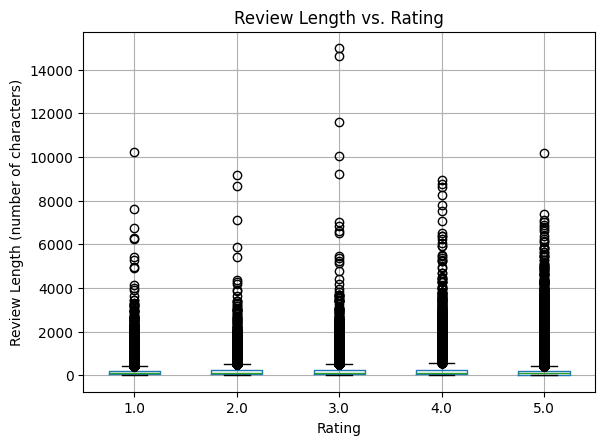

In [30]:
plt.figure(figsize=(10, 6))
data.boxplot(column='review_length', by='rating', grid=False)
plt.title('Review Length vs. Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Review Length (number of characters)')
plt.grid(True)
plt.show()

### 3. Top 10 reviewed products by Product ID

In [31]:
start_time = time.time()
count_by_id = data.groupby("asin").size().reset_index(name="review_count")
top_10 = count_by_id.sort_values(by="review_count", ascending=False).head(10)
evaluate(top_10)
q3_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 popular products: {q3_t} seconds")
fireducks_exec_time_tracker.append(q3_t)
top_10

[fireducks.pandas] Time taken for finding top-10 popular products: 0.06137251853942871 seconds


,asin,review_count
5476,B007IAE5WY,1962
8717,B00EEN2HCS,1750
49919,B07C533XCW,1513
15524,B00R1TAN7I,1372
93618,B08L5KN7X4,1343
23259,B019GBG0IE,1328
38782,B0719KWG8H,1168
6364,B0092MCQZ4,1128
19090,B0107QYW14,1112
5290,B0070Z7KME,934


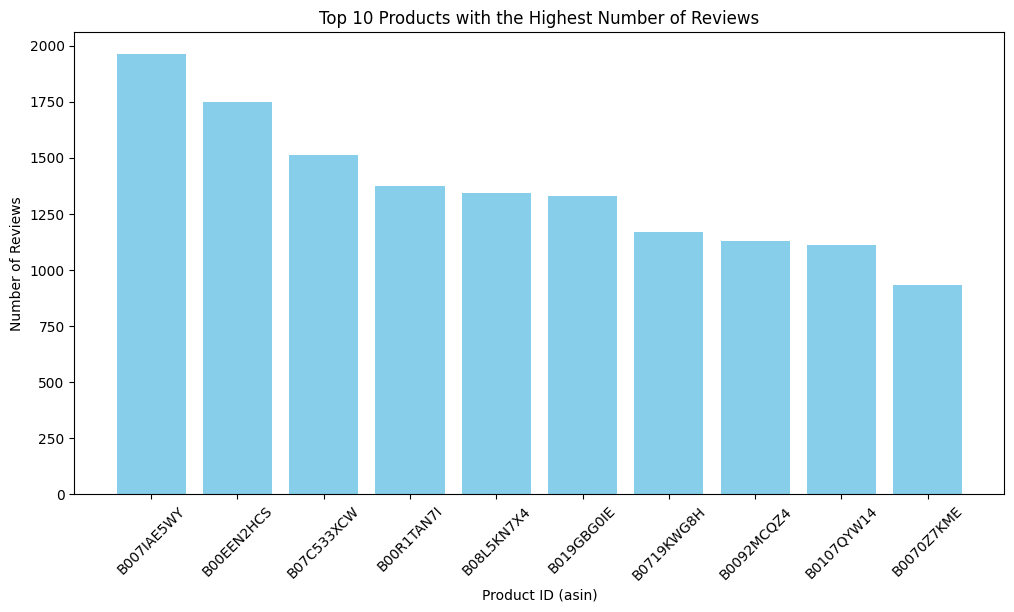

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(top_10['asin'], top_10["review_count"], color='skyblue')
plt.xlabel('Product ID (asin)')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Products with the Highest Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### 4. Most active users

In [33]:
start_time = time.time()
count_by_userid = data.groupby("user_id").size().reset_index(name="review_count")
popular_user = count_by_userid.sort_values(by="review_count", ascending=False).head(10)
evaluate(popular_user)
q4_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 popular users: {q4_t} seconds")
fireducks_exec_time_tracker.append(q4_t)
popular_user

[fireducks.pandas] Time taken for finding top-10 popular users: 0.2272024154663086 seconds


,user_id,review_count
340457,AG73BVBKUOH22USSFJA5ZWL7AKXA,165
156408,AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,146
92332,AEMP3A7IKW37CMWFXNKXWW6HGJHA_1,115
522437,AHDVSLWHSORYGG3S5QZMVDFNOXUQ,108
472775,AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,87
206979,AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2,83
302694,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,81
78240,AEJU3Z6HDAERETMYI2CXBQVPPDFA,79
622381,AHY2TURQPNIDXZGH2CMQLZ343YMQ,69
101652,AEOK4TQIKGO23SJKZ6PW4FETNNDA_1,68


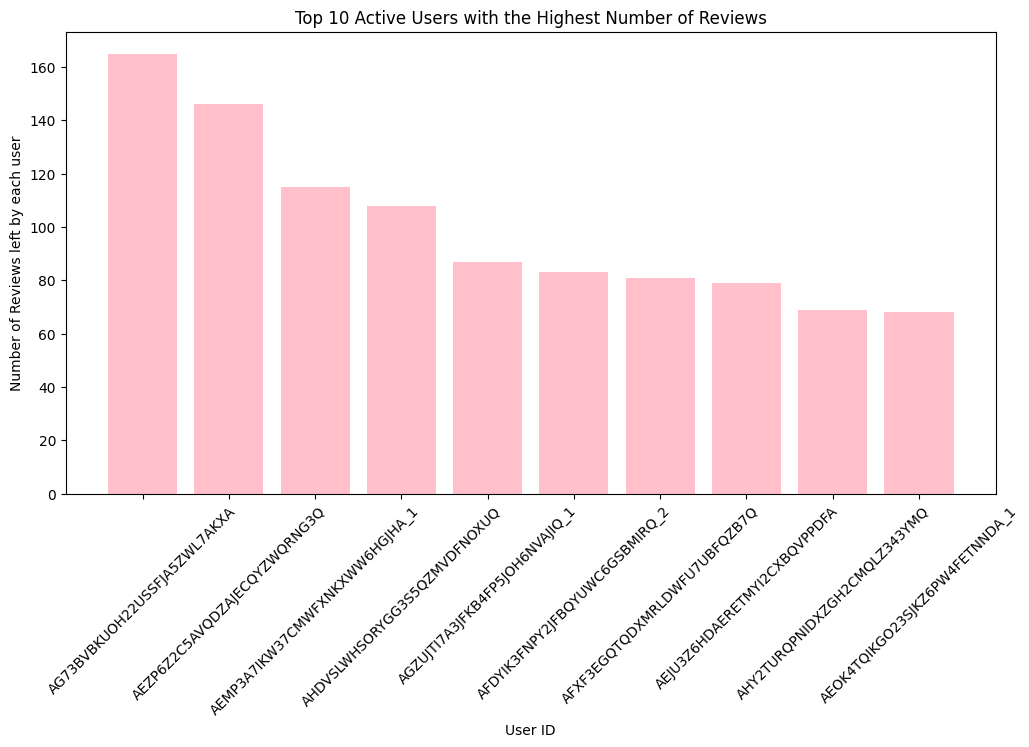

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(popular_user["user_id"], popular_user["review_count"], color='pink')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews left by each user')
plt.title('Top 10 Active Users with the Highest Number of Reviews')
plt.xticks(rotation=45)
plt.show()

## Evaluating the difference in `Pandas` and `Fireducks`

In [35]:
# adding new evaluation result using FireDucks
eval_df = pd.read_csv("eval.csv", index_col = 0)
eval_df["fireducks_exec_time (s)"] = fireducks_exec_time_tracker
eval_df["speed-up"] = round(eval_df["pandas_exec_time (s)"] / eval_df["fireducks_exec_time (s)"], 2)
eval_df.to_csv("eval.csv")
eval_df

,pandas_exec_time (s),fireducks_exec_time (s),speed-up
task,,,
data_loading,9.095801,1.961791,4.64
query_1,0.022947,0.023617,0.97
query_2,0.238798,0.016897,14.13
query_3,0.453154,0.061373,7.38
query_4,1.638759,0.227202,7.21


Both the libraries give out the same output, therefore, the output is correct. As expected, `FireDucks` takes very little time in comparison to `pandas` in most of the above cases.

Also, `FireDucks` seamlessly integrates with `pandas` and other libraries (like `matplotlib` etc.) that use `pandas` internally, ensuring compatibility and ease of use. 
**We did not require to convert the `FireDucks` instances to the `pandas` instances before using these libraries.**

## Conclusion

In this article, we explored the Amazon Review Dataset under the Beauty category using FireDucks and Pandas. For each operation, FireDucks performed faster than pandas establishing that the former is a better alternative. 

We tried to address four questions, starting with the distribution of ratings. We saw that most ratings had `5 stars`, whereas the `2 star` ratings count was the lowest. 

Next, we hypothesized whether there exists a relationship between the review length and the rating left by the user. We found that the review lengths of `5 star` and `4 star` were indeed higher than those of `1 star` or `2 star` ratings.

Our third question focused on finding the most popular products by review count. Using matplotlib, we plotted the top 10 products in the category.

Lastly, we found the top 10 users who left the most number of ratings. With [FireDucks](https://fireducks-dev.github.io/), it was possible to execute each operation quickly and efficiently. This is because the FireDucks library by NEC is a specialized tool designed for high-performance data processing and analysis. It is developed to handle large-scale datasets with efficiency and speed.

FireDucks is especially helpful for industries requiring quick, reliable data insights, making it a valuable asset to enhance their data analytics capabilities. 